# K-Nearest Neighbors Algorithm

Knn is a supervised machine learning algorithm. A supervised model has both a target variable and independent variables.

The **target variable or dependent **variable, denoted **y**, depends on the independent variables and is the value you seek to predict.

The **independent variables**, denoted **x** (single valued) or X (multi valued), are known ahead of time and are used to predict y.


Knn can be used for both **classification** and **regression**.

Classification models predict a categorical target variable and regression models predict a numeric target.


KNN is the instanced based algorithm (`lazy-learning` method)

Models based on instance-based learning to generalize beyond the training examples. To do so,
* they store the training examples first. When it encounters a new instance (or test example),
* then they instantly build a relationship between stored training examples and
* this new instant to assign a target function value for this new instance.

Instance-based methods are sometimes called **lazy learning** methods because they postponed learning until the new instance is encountered for prediction.

**Basic Assumption:**

All instances correspond to points in the `n-dimensional` space where `n` represents the number of features in any instance.

The nearest neighbors of an instance are defined in terms of the `Euclidean` distance.

An instance can be represented by `< x1, x2, .............., xn >`.

Euclidean distance between two instances xa and xb is given by $d( x_a, x_b )$

$$Distance(x,y) = \sqrt{\sum_{j=1}^{n}(x_j^a -x_j^b)^2} $$



## Algorithm

**Pseudocode**

1. Store all training examples.
2. Repeat steps 3, 4, and 5 for each test example.
3. Find the `K` number of training examples nearest to the current test example.
4. `y_pred` for current test example =  most common class among K-Nearest training instances.
5. Go to step 2.



## Define value of `K`

The `k` value in the `k-NN` algorithm defines how many neighbors will be checked to determine the classification of a specific query point.

Defining `k` can be a balancing act as different values can lead to overfitting or underfitting.

**Lower values of k** can have high variance, but low bias, and larger values of k may lead to high bias and lower variance.

The **choice of k will largely depend on the input data** as data with more outliers or noise will likely perform better with higher values of **k**.

Overall, it is recommended to have an **odd number for k to avoid ties** in classification, and cross-validation tactics can help you choose the optimal k for your dataset.

## How KNN works

- **Training Phase:**

    The algorithm simply stores the entire training dataset in memory.

- **Prediction Phase:**

    When a new instance is presented for classification, the algorithm calculates the distance between this instance and all other instances in the training dataset.
        
    It then selects the K-nearest neighbors (K is a user-defined parameter) based on the calculated distances.
        
    For classification, the algorithm assigns the class label that is most common among the K-nearest neighbors (i.e., the majority class).
        
    For regression, the algorithm assigns the average value of the K-nearest neighbors.



## Application of KNN

- **Text Classification:**

    KNN can be used for text classification tasks, such as sentiment analysis or spam detection. In this case, each document is represented as a vector of word frequencies or TF-IDF scores, and KNN can classify new documents based on their similarity to existing documents.

- **Pattern Recognition:**

    KNN has also assisted in identifying patterns, such as in text and digit classification. This has been particularly helpful in identifying handwritten numbers that you might find on forms or mailing envelopes.

- **Healthcare**

    KNN has also had application within the healthcare industry, making predictions on the risk of heart attacks and prostate cancer. The algorithm works by calculating the most likely gene expressions.

## Advantages

- Easy to implement: Given the algorithm’s simplicity and accuracy, it is one of the first classifiers that a new data scientist will learn.

- Adapts easily: As new training samples are added, the algorithm adjusts to account for any new data since all training data is stored into memory.

- Few hyperparameters: KNN only requires a k value and a distance metric, which is low when compared to other machine learning algorithms.

## Disadvantages


- **Does not scale well:** Since KNN is a lazy algorithm, it takes up more memory and data storage compared to other classifiers. This can be costly from both a time and money perspective. More memory and storage will drive up business expenses and more data can take longer to compute. While different data structures, such as Ball-Tree, have been created to address the computational inefficiencies, a different classifier may be ideal depending on the business problem.

- **Curse of dimensionality:** The KNN algorithm tends to fall victim to the curse of dimensionality, which means that it doesn’t perform well with high-dimensional data inputs. This is sometimes also referred to as the peaking phenomenon, where after the algorithm attains the optimal number of features, additional features increases the amount of classification errors, especially when the sample size is smaller.

- **Prone to overfitting:** Due to the “curse of dimensionality”, KNN is also more prone to overfitting. While feature selection and dimensionality reduction techniques are leveraged to prevent this from occurring, the value of k can also impact the model’s behavior. Lower values of k can overfit the data, whereas higher values of k tend to “smooth out” the prediction values since it is averaging the values over a greater area, or neighborhood. However, if the value of k is too high, then it can underfit the data.


## Implementation of KNN

Dataset: Iris Dataset - this is used for evaluating the classification algorithms

The data set contains **3 classes** of **50 instances** each, where each class refers to a type of iris plant.

https://archive.ics.uci.edu/dataset/53/iris


**Attributes**
1. Sepal length: Contineous variable
2. Sepal width
3. petal length
4. petal width
5. Class: Setosa, Versicolour, Virginica

This dataset can be extracted from `sklearn`'s datasets module

    data: contineous values of attributes
    target: classification class



Load `iris` dataset from the `sklearn`

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
x = iris['data']
y = iris['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

### Helper functions


In [4]:
import numpy as np

The function `most_common(lst)` finds and returns the most frequently occurring element in the given list `lst`.

In [5]:
def most_common(lst):
    return max(set(lst), key=lst.count)

Euclidean distance between two instances xa and xb is given by $d( x_a, x_b )$

$$Distance(x,y) = \sqrt{\sum_{j=1}^{n}(x_j^a -x_j^b)^2} $$

In [6]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

### Implementation of KNN Classifier
- Initialize the model from the given dataset
- fit the model
- predict

In [24]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k
        self.distance_method = euclidean

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        neighbors = []
        for x in x_test:
            distances = self.distance_method(x, self.x_train)
            y_sorted = [y for _, y in sorted(zip(distances,self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

    def evaluate(self, x_test, y_test):
        y_pred = self.predict(x_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

### Use KNN for prediction

In [25]:
k = 3

knn = KNNClassifier(k=3)
knn.fit(x_train, y_train)

computed_y_test = knn.predict(x_test)

In [26]:
# Check how it is computing the output

list(zip(computed_y_test, y_test))

[(0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (2, 2),
 (1, 1),
 (2, 2),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (2, 2),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2)]

### Compute Accuracy

In [27]:
y_pred = knn.predict(x_test)
accuracy = sum(y_pred == y_test) / len(y_test)

print(f"Accuracy = {accuracy}")

Accuracy = 1.0


### Visualize accuracy vs. k

In [17]:
import matplotlib.pyplot as plt

Hyperparameter estimation (identification of value of K) using grid search

In [29]:
accuracies = []

ks = range(1,10)
for k in ks:
    knn = KNNClassifier(k)
    knn.fit(x_train, y_train)
    knn.predict(x_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)

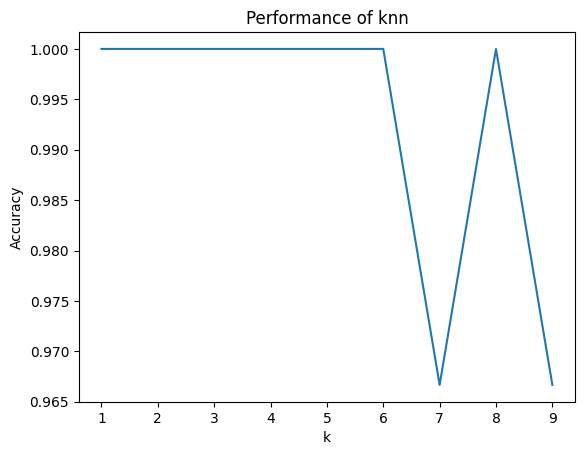

In [30]:
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

## Do it yourself

Use the following distance method and on the data set above and compare the accuracy of the model.

- Manhattan Distance

    Manhattan Distance metric is generally used when we are interested in the total distance traveled by the object instead of the displacement. This metric is calculated by summing the absolute difference between the coordinates of the points in n-dimensions.
    
   $$d\left ( x,y \right )={\sum_{i=1}^{n}\left | x_i-y_i \right |}$$

- Minkowski Distance

    We can say that the Euclidean, as well as the Manhattan distance, are special cases of the Minkowski distance.

   $$d ( x,y  )=( {\sum_{i=1}^{n} ( x_i-y_i  )^p}  )^{\frac{1}{p}}$$

    From the formula above we can say that when p = 2 then it is the same as the formula for the Euclidean distance and when p = 1 then we obtain the formula for the Manhattan distance.




## Working with different dataset

Diabetes dataset `diabetes.csv`

**Attributes**
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

**Outcome**: The classification column.
           
Values: `1, 0`



In [32]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
x = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

In [ ]:
x

In [ ]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [34]:
# perform evaluation
knn = KNNClassifier(k=5)
knn.fit(x_train, y_train)
# computed_y_test = knn.predict_class(x_test)
accuracy = knn.evaluate(x_test, y_test)
accuracy

1.0

In [35]:
# normalize the dataset and try to evaluate again
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(x_train)
x_train, x_test = ss.transform(x_train), ss.transform(x_test)
x_train

array([[ 0.31553662, -0.04578885,  0.44767531,  0.23380268],
       [ 2.2449325 , -0.04578885,  1.29769171,  1.39742892],
       [-0.2873996 , -1.24028061,  0.05100098, -0.15407273],
       [ 0.67729835, -0.52358555,  1.01435291,  1.13884531],
       [-0.04622511, -0.52358555,  0.73101411,  1.52672073],
       [-0.64916132,  1.62649961, -1.30902526, -1.31769898],
       [-0.40798684, -1.71807731,  0.10766874,  0.10451088],
       [-0.76974857,  0.90980456, -1.36569302, -1.31769898],
       [ 0.79788559, -0.52358555,  0.44767531,  0.36309449],
       [ 1.03906007, -1.24028061,  1.12768843,  0.7509699 ],
       [ 1.15964732, -0.04578885,  0.95768515,  1.13884531],
       [-0.89033581,  1.14870291, -1.36569302, -1.18840717],
       [ 0.19494938, -1.95697567,  0.67434635,  0.36309449],
       [ 0.5567111 , -0.2846872 ,  1.01435291,  0.7509699 ],
       [ 0.91847283, -0.2846872 ,  0.44767531,  0.10451088],
       [ 2.2449325 , -1.00138226,  1.75103379,  1.39742892],
       [-0.16681235,  1.

In [37]:
# perform evaluation
knn = KNNClassifier(k=7)
knn.fit(x_train, y_train)
# computed_y_test = knn.predict_class(x_test)
accuracy = knn.evaluate(x_test, y_test)
accuracy



0.9666666666666667

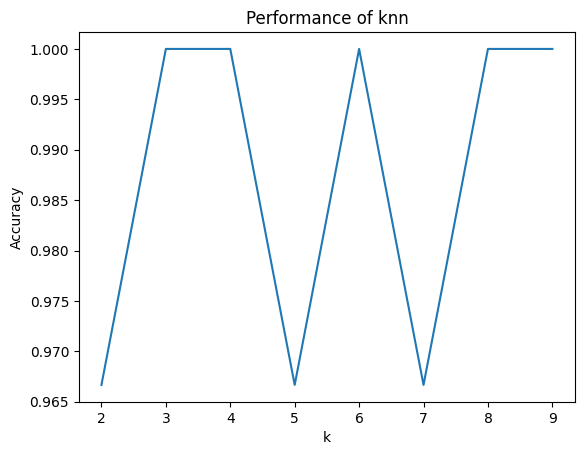

In [38]:
accuracies = []

ks = range(2,10)
for k in ks:
    knn = KNNClassifier(k)
    knn.fit(x_train, y_train)
    knn.predict(x_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)

fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()